# <center><code style="background:black;color:white">McDonald's Data Analysis</code></center>

## <code style="background:yellow">1. Importing Libraries</code>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [36]:
# Ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [37]:
# to display maximum rows and column

pd.set_option("max_columns", None)
pd.set_option("max_rows", None)

In [38]:
# Default size of plot

plt.rcParams['figure.figsize'] = (10, 7)

## <code style="background:yellow">2. Importing Data</code>

In [39]:
data = pd.read_csv("menu.csv")
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [40]:
# Checking the number of rows and columns

data.shape

(260, 24)

In [41]:
# Data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [42]:
# Statistical summary

data.describe().round()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0
mean,368.0,127.0,14.0,22.0,6.0,30.0,0.0,55.0,18.0,496.0,21.0,47.0,16.0,2.0,7.0,29.0,13.0,13.0,9.0,21.0,8.0
std,240.0,128.0,14.0,22.0,5.0,27.0,0.0,87.0,29.0,577.0,24.0,28.0,9.0,2.0,6.0,29.0,11.0,24.0,26.0,17.0,9.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,210.0,20.0,2.0,4.0,1.0,5.0,0.0,5.0,2.0,108.0,5.0,30.0,10.0,0.0,0.0,6.0,4.0,2.0,0.0,6.0,0.0
50%,340.0,100.0,11.0,17.0,5.0,24.0,0.0,35.0,11.0,190.0,8.0,44.0,15.0,1.0,5.0,18.0,12.0,8.0,0.0,20.0,4.0
75%,500.0,200.0,22.0,35.0,10.0,48.0,0.0,65.0,21.0,865.0,36.0,60.0,20.0,3.0,10.0,48.0,19.0,15.0,4.0,30.0,15.0
max,1880.0,1060.0,118.0,182.0,20.0,102.0,2.0,575.0,192.0,3600.0,150.0,141.0,47.0,7.0,28.0,128.0,87.0,170.0,240.0,70.0,40.0


## <code style="background:yellow">3. Checking the missing values</code>

In [43]:
data.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

### <font color="marroon"><u>Inference :</u></font>
 * No missing value present in the data

## <code style="background:yellow">4. Checking Outliers</code>

In [44]:
num_col = data.select_dtypes(exclude="object").columns
num_col.size, num_col

(21,
 Index(['Calories', 'Calories from Fat', 'Total Fat',
        'Total Fat (% Daily Value)', 'Saturated Fat',
        'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
        'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
        'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
        'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
        'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
        'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
       dtype='object'))

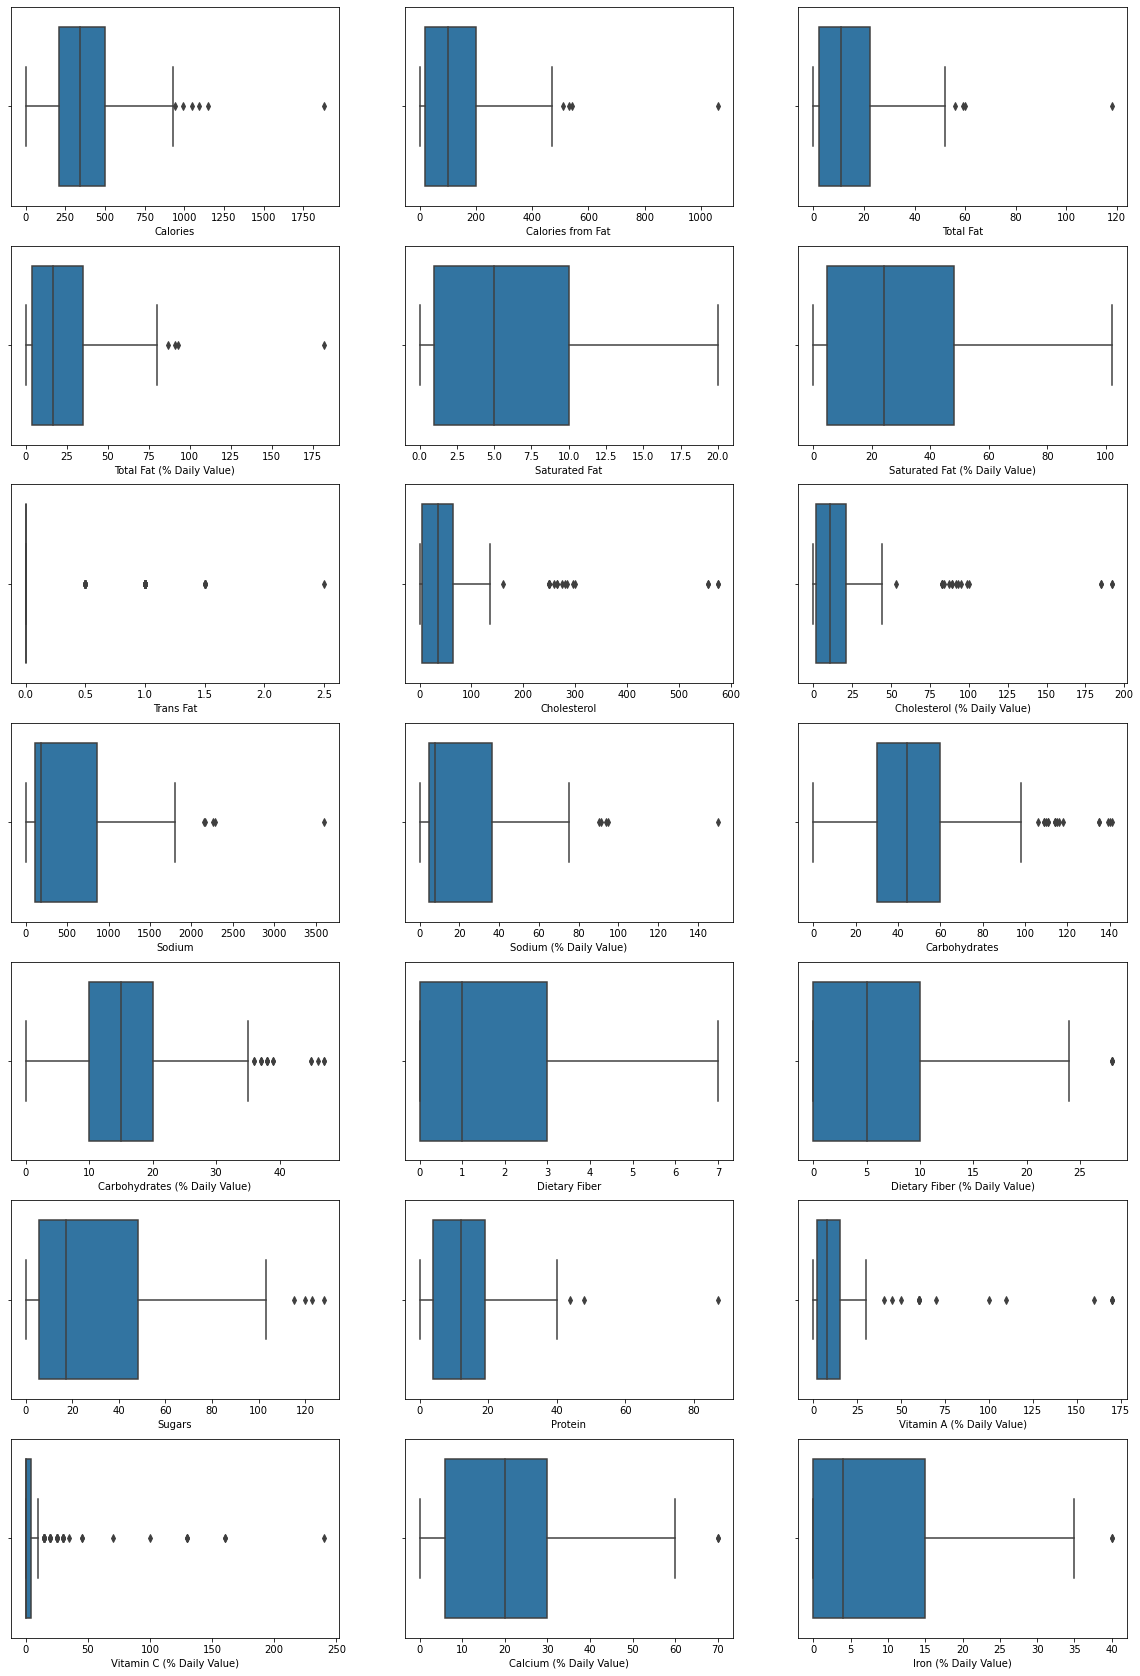

In [45]:
# Box plot to display all the numerical variables to check the outliers

plt.figure(figsize=(20,30))
count = 1

for i in num_col:
    plt.subplot(7,3,count)
    sns.boxplot(data[i])
    count+=1

In [46]:
# Displaying the column name which contain outliers

df = data.select_dtypes(exclude="object")
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers


for x in num_col:
    outliers = find_outliers_IQR(data[x])
    if(len(outliers) > 0):
        print("Columns which contain outlier = ", x)
        print("number of outliers:", len(outliers))
        print("max outlier value:", outliers.max())
        print("min outlier value:", outliers.min())
        print("--------------------------------------------------------------")   


Columns which contain outlier =  Calories
number of outliers: 6
max outlier value: 1880
min outlier value: 940
--------------------------------------------------------------
Columns which contain outlier =  Calories from Fat
number of outliers: 4
max outlier value: 1060
min outlier value: 510
--------------------------------------------------------------
Columns which contain outlier =  Total Fat
number of outliers: 4
max outlier value: 118.0
min outlier value: 56.0
--------------------------------------------------------------
Columns which contain outlier =  Total Fat (% Daily Value)
number of outliers: 4
max outlier value: 182
min outlier value: 87
--------------------------------------------------------------
Columns which contain outlier =  Trans Fat
number of outliers: 56
max outlier value: 2.5
min outlier value: 0.5
--------------------------------------------------------------
Columns which contain outlier =  Cholesterol
number of outliers: 18
max outlier value: 575
min outlier

### <font color="marroon"><u>Inference : </u></font>
  * Columns which doesn't contain outliers are - 
    1. Saturated Fat
    2. Saturated Fat (% Daily Value)
    3. Dietary Fiber

In [47]:
# Information about data set

data.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

## <code style="background:yellow">5. EDA(Exploratory data analysis)</code>

## Food Category which has the highest and lowest varieties.

In [48]:
data.Category.value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

In [49]:
fig = px.pie(data_frame=data, names="Category", title=" Food Category")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Highest Varieties - Coffee and Tea 
* Lowest Varieties - Salads

In [50]:
data.Item.unique()

array(['Egg McMuffin', 'Egg White Delight', 'Sausage McMuffin',
       'Sausage McMuffin with Egg', 'Sausage McMuffin with Egg Whites',
       'Steak & Egg McMuffin',
       'Bacon, Egg & Cheese Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit (Large Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)',
       'Sausage Biscuit (Regular Biscuit)',
       'Sausage Biscuit (Large Biscuit)',
       'Sausage Biscuit with Egg (Regular Biscuit)',
       'Sausage Biscuit with Egg (Large Biscuit)',
       'Sausage Biscuit with Egg Whites (Regular Biscuit)',
       'Sausage Biscuit with Egg Whites (Large Biscuit)',
       'Southern Style Chicken Biscuit (Regular Biscuit)',
       'Southern Style Chicken Biscuit (Large Biscuit)',
       'Steak & Egg Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese McGriddles',
       'Bacon, Egg & Cheese McGriddles with Egg Whites',
       'Sau

## <code style="background:yellow">6. Checking Correlation</code>

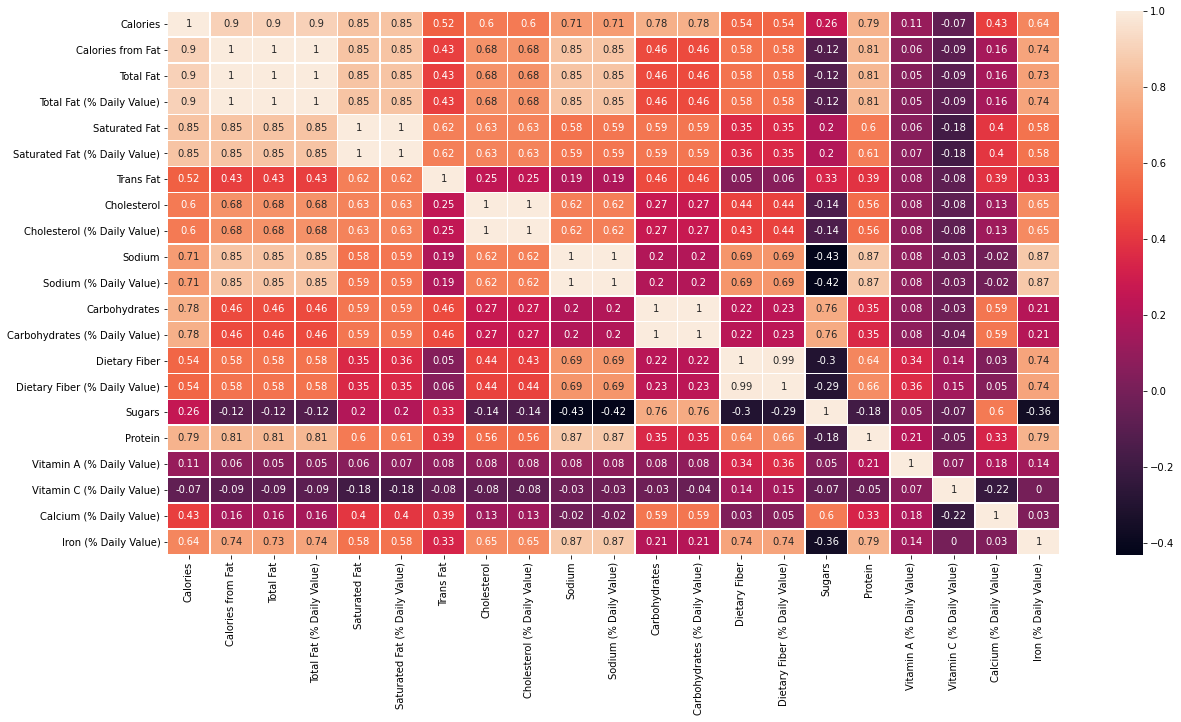

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().round(2), annot=True, linewidths=.5)
plt.show()

## Top 10 Item containing highest Calories

In [52]:
fig = px.funnel(data.groupby("Item")["Calories"].sum().sort_values(ascending=False).head(10))
fig.show()

## Top 10 Item containing highest Total Fat (% Daily Value)

In [53]:
fig = px.funnel(data.groupby("Item")["Total Fat (% Daily Value)"].sum().sort_values(ascending=False).head(10))
fig.show()

## Top 10 Item containing highest Cholesterol (% Daily Value)

In [54]:
fig = px.funnel(data.groupby("Item")["Cholesterol (% Daily Value)"].sum().sort_values(ascending=False).head(10))
fig.show()

## Top 10 Item containing highest Sodium (% Daily Value)

In [55]:
fig = px.funnel(data.groupby("Item")["Sodium (% Daily Value)"].sum().sort_values(ascending=False).head(10))
fig.show()

## Top 10 Item containing highest Sugar

In [56]:
fig = px.funnel(data.groupby("Item")["Sugars"].sum().sort_values(ascending=False).head(10))
fig.show()

## Top 10 Item containing highest Carbohydrates (% Daily Value) 

In [57]:
fig = px.funnel(data.groupby("Item")["Carbohydrates (% Daily Value)"].sum().sort_values(ascending=False).head(10))
fig.show()

## Category VS Calories

In [58]:
fig = px.box(data_frame=data, x="Category", y="Calories", title="Category VS Calories", color="Category")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Chicken and Fish contain maximum Calories followed by Breakfast

## Category VS Total Fat

In [59]:
fig = px.box(data_frame=data, x="Category", y="Total Fat (% Daily Value)", title="Category VS Total Fat", color="Category")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Chicken and Fish contain high Fat, followed by Breakfast

## Category VS Saturated Fat

In [60]:
fig = px.box(data_frame=data, x="Category", y="Saturated Fat (% Daily Value)", title="Category VS Saturated Fat", color="Category")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Chicken and Fish contain maximum Calories followed by Breakfast.
* Beverages contain lowest Saturated Fat

## Category VS Cholestrol

In [61]:
fig = px.box(data_frame=data, x="Category", y="Cholesterol (% Daily Value)", title="Category VS Cholestrol", color="Category")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Breakfast contain high amount of Cholestrol.

## Category VS Sodium

In [62]:
fig = px.box(data_frame=data, x="Category", y="Sodium (% Daily Value)", title="Category VS Sodium", color="Category")
fig.show()

### <font color="marroon"><u>Inference :</u></font> 
* Chicken and Fish contain highest amount of Sodium.

## Category VS Carbohydrates

In [63]:
fig=px.box(data_frame=data, x="Category", y="Carbohydrates (% Daily Value)", title="Category VS Carbohydrates", color="Category")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Smoothies and Shakes contain highest Carbohydrates.

## Category VS Dietary Fiber

In [64]:
fig = px.box(data_frame=data, x="Category", y="Dietary Fiber (% Daily Value)", title="Category VS Dietary Fiber", color="Category")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Breakfast and Salads contain large amount of fiber.

## Category VS Sugar

In [65]:
fig = px.box(data_frame=data, x="Category", y="Sugars", title="Category VS Sugars", color="Category")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Highest - Smoothies & Shakes
* Lowest - Beef & Pork

## Category VS Protein

In [66]:
fig = px.box(data_frame=data, x="Category", y="Protein", title="Category VS Protein", color="Category")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Chicken and Fish contain maximum protein

## Category VS Vitamin A

In [67]:
fig = px.box(data_frame=data, x="Category", y="Vitamin A (% Daily Value)", title="Category VS Vitamin A", color="Category")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Vitamin A is mostly present in Salads

## Category VS Vitamin C

In [68]:
fig = px.box(data_frame=data, x="Category", y="Vitamin C (% Daily Value)", title="Category VS Vitamin C", color="Category")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Beverages contain highest amount of Vitamin C

## Category VS Calcium

In [69]:
fig = px.box(data_frame=data, x="Category", y="Calcium (% Daily Value)", title="Category VS Calcium", color="Category")
fig.show()

## Category VS Iron

In [70]:
fig = px.box(data_frame=data, x="Category", y="Iron (% Daily Value)", title="Category VS Iron", color="Category")
fig.show()

## Calories VS Total Fat (% Daily Value)

In [71]:
fig = px.scatter(data_frame=data, x="Total Fat (% Daily Value)", y="Calories", color="Category", size="Calories", template="plotly_dark")
fig.show()

## Calories VS Carbohydrates (% Daily Value)

In [72]:
fig = px.scatter(data_frame=data, x="Calories", y="Carbohydrates (% Daily Value)", color="Category", size="Carbohydrates (% Daily Value)", template="plotly_dark")
fig.show()

## Protein VS Total Fat

In [73]:
fig = px.scatter(data_frame=data, x="Protein", y="Total Fat (% Daily Value)", color="Category", size="Total Fat (% Daily Value)", template="plotly_dark")
fig.show()

### <font color="marroon"><u>Inference : </u></font>
* Chicken and Fish contain highest protein, but Fat content is also on higher side.